<a href="https://colab.research.google.com/github/LabSWPP12023S2G2/TPInicial/blob/main/testingplots-mental-health-post-COVID19-arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Importamos librerias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px

In [41]:
# Carga de dataset
url = 'https://raw.githubusercontent.com/LabSWPP12023S2G2/TPInicial/main/datasetUNC.csv'
data = pd.read_csv(url, delimiter=';')
columns_to_drop = ['SUB PERIODS', 'SEX']
data = data.drop(columns=columns_to_drop)
data = data.dropna(axis=0)
data.drop(data[data['PROVINCE'] == 'Otro'].index, inplace=True)
data.drop(data[data['PROVINCE'] == 'other'].index, inplace=True)
data.drop(data[data['EDUCATION'] == 'Otro'].index, inplace=True)

In [42]:
# Asignaciones para columnas no númericas
assignment_mapping = {
    'MENTAL DISORDER HISTORY': {'no': 0, 'yes': 50},
    'EDUCATION': {
        'Completed postgraduate': 30,
        'Incomplete tertiary or university': 60,
        'Completed high school': 70,
        'Incomplete postgraduate': 40,
        'Completed tertiary or university': 50,
        'Incomplete high school': 80,
        'Incomplete elementary school': 100,
        'Completed elementary school': 90
    },
    'SUIC ATTEMPT HISTORY': {'ideation': 50, 'no': 0, 'yes': 100},
    'LIVING WITH SOMEBODY': {'no': 20, 'yes': 0},
    'ECONOMIC INCOME': {'yes': 0, 'no': 50}
}

# Aplicamos las asignaciones
for column, mapping in assignment_mapping.items():
    data[column] = data[column].map(mapping)

In [43]:
# Función para asignar una región a cada provincia
def assign_region(province):
    if province in ['Corrientes', 'Chaco', 'Misiones', 'Formosa', 'Entre Ríos']:
        return 'Nordeste-Litoral'
    elif province in ['Tucumán', 'Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero']:
        return 'Noroeste'
    elif province in ['San Luis', 'San Juan', 'Mendoza', 'La Rioja']:
        return 'Cuyo'
    elif province in ['Neuquén', 'Río Negro', 'La Pampa']:
        return 'Patagonia Centro-Norte'
    elif province in ['Tierra del Fuego', 'Santa Cruz', 'Chubut']:
        return 'Patagonia Centro-Sur'
    elif province == 'Santa Fe':
        return 'Santa Fe'
    elif province == 'Buenos Aires provincia':
        return 'Buenos Aires'
    elif province == 'Córdoba':
        return 'Córdoba'
    else:
        return 'CABA'

# Aplicamos la función a la columna 'PROVINCE' y guardamos el resultado en una nueva columna 'REGION'
data['REGION'] = data['PROVINCE'].apply(assign_region)

# Crea un LabelEncoder para codificar la columna 'REGION'
label_encoder = LabelEncoder()
data['REGION ENCODED'] = label_encoder.fit_transform(data['REGION'])

In [44]:
# Calcula el promedio de las variables excepto "SUIC RISK"
mean = data.drop(['REGION ENCODED', 'PROVINCE', 'REGION'], axis=1).mean(axis=1)
data['PROM SUIC'] = mean
data_ref = data[['SUIC RISK', 'PROM SUIC']]

In [ ]:
# Método del codo
inertia_values = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(data_ref)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias Cuadradas Intra-Cluster')
plt.title('Método del codo')
plt.show()

In [ ]:
# Análisis de siluetas
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(data_ref)
    silhouette_avg = silhouette_score(data_ref, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(data_ref, cluster_labels)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de silueta promedio')
plt.title('Análisis de siluetas')
plt.grid(True)
plt.show()

In [ ]:
# Aplicamos K-Means para clasificar las regiones en grupos
kmeans = KMeans(n_clusters=3, n_init=100, random_state=0).fit(data_ref)
data_ref['Cluster'] = kmeans.labels_

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=80)
tsne_coordinates = tsne.fit_transform(data_ref)
data_ref['tsne_x'] = tsne_coordinates[:, 0]
data_ref['tsne_y'] = tsne_coordinates[:, 1]

In [ ]:
# Aplicamos K-Means para clasificar las regiones en grupos
kmeans = KMeans(n_clusters=3, n_init=100, random_state=0).fit(data_ref)
data_ref['Cluster'] = kmeans.labels_

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=3, random_state=0, perplexity=80)
tsne_coordinates = tsne.fit_transform(data_ref)
data_ref['tsne_x'] = tsne_coordinates[:, 0]
data_ref['tsne_y'] = tsne_coordinates[:, 1]
data_ref['tsne_z'] = tsne_coordinates[:, 2]

In [ ]:
# Verifica si clasifica bien elementos nuevos
x_in = np.asarray([0 ,10]).reshape(1,-1)
predicts = kmeans.predict(x_in)
predicts[0]

In [ ]:
# Vuelvo a agregar columnas para posterior visualizacion
columns_to_copy = ['PROVINCE', 'EDUCATION', 'AGE', 'MENTAL DISORDER HISTORY', 'SUIC ATTEMPT HISTORY',
                   'LIVING WITH SOMEBODY', 'ECONOMIC INCOME', 'DEPRESSION', 'SUIC RISK', 'ANXIETY STATE',
                   'ANXIETY TRAIT', 'REGION']
for col in columns_to_copy:
    data_ref[col] = data[col].copy()

# Generación de colores para los clusters
cluster_colors = plt.cm.tab10.colors

In [47]:
# Diccionario para mapear los nombres de los clusters
cluster_names = {
    0: 'Riesgo medio',
    1: 'Riesgo bajo',
    2: 'Riesgo alto',
}

In [ ]:
# Definir una lista de colores predeterminados
colors = ['#f1605d', '#feca8d', '#9e2f7f']

# Crear un scatter plot
plt.figure(figsize=(12, 8))
unique_clusters = np.unique(kmeans.labels_)
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    cluster_name = cluster_names.get(cluster, f'Cluster {cluster}')

    # Asignar color a cada cluster
    color = colors[i % len(colors)]

    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                label=cluster_name, alpha=0.7, s=50, c=color)

plt.xlabel('t-SNE x')
plt.ylabel('t-SNE y')
plt.show()

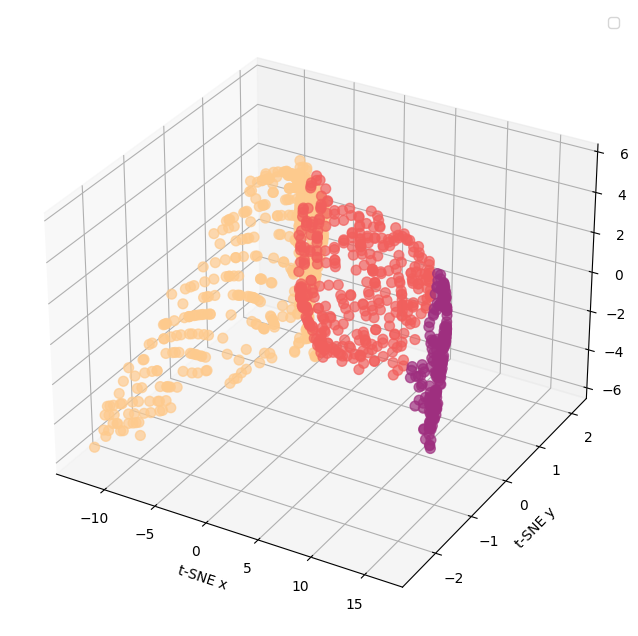

In [ ]:
# Crear un scatter plot en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

unique_clusters = np.unique(kmeans.labels_)
colors = ['#f1605d', '#feca8d', '#9e2f7f']

for i, cluster in enumerate(unique_clusters):
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    cluster_name = cluster_names.get(cluster, f'Cluster {cluster}')
    color = colors[i % len(colors)]

    ax.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], cluster_data['tsne_z'],
              alpha=0.7, s=50, c=color)

ax.set_xlabel('t-SNE x')
ax.set_ylabel('t-SNE y')
ax.set_zlabel('t-SNE z')
plt.legend()
plt.show()

In [36]:
# Define una paleta de colores personalizada en formato hexadecimal
custom_palette = {
    'Riesgo bajo': '#feca8d',
    'Riesgo medio': '#f1605d',
    'Riesgo alto': '#9e2f7f'
}

# Mapea los nombres de los clusters a la paleta de colores
#data_ref['Riesgo'] = data_ref['Cluster'].map(cluster_names)

fig = px.scatter_3d(data_ref, x='tsne_x', y='tsne_y', z='tsne_z', color='Riesgo', color_discrete_map=custom_palette,
                     opacity=0.7)

fig.update_layout(scene=dict(xaxis_title='t-SNE x', yaxis_title='t-SNE y', zaxis_title='t-SNE z'), margin=dict(r=200))
fig.show()

In [60]:
import plotly.express as px
import plotly.graph_objects as go

def scatter_plot_clusters(data_ref, kmeans, cluster_names):
    colors = ['#f1605d', '#feca8d', '#9e2f7f']

    # Calcula el rango en el eje y
    y_range = data_ref['tsne_y'].max() - data_ref['tsne_y'].min()

    fig = px.scatter(data_ref, x='tsne_x', y='tsne_y', color='Cluster',
                     color_continuous_scale=colors,
                     title="Scatter Plot de Clusters y t-SNE")

    for i, cluster_name in cluster_names.items():
        fig.add_trace(go.Scatter(
            x=data_ref[data_ref['Cluster'] == i]['tsne_x'],
            y=data_ref[data_ref['Cluster'] == i]['tsne_y'],
            mode='markers',
            name=cluster_name,
            marker=dict(size=10, opacity=0.7, color=colors[i % len(colors)])
        ))

    fig.update_layout(
        xaxis_title="t-SNE x",
        yaxis_title="t-SNE y",
        yaxis=dict(dtick=2.5),  # Establece el espaciado deseado en el eje y
        height=200 + (y_range // 2.5) * 100  # Ajusta la altura del gráfico en función del espaciado en el eje y
    )

    fig.update(layout_coloraxis_showscale=False)

    return fig

# Ejemplo de uso
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C"}  # Define tus nombres de clúster aquí
# Llama a la función scatter_plot_clusters con tus datos y nombres de clúster
fig = scatter_plot_clusters(data_ref, kmeans, cluster_names)
fig.show()


In [ ]:
data_ref = data_ref.drop(['Cluster Name'], axis=1)

In [ ]:
data_ref

,SUIC RISK,PROM SUIC,Cluster,tsne_x,tsne_y,tsne_z,PROVINCE,EDUCATION,AGE,MENTAL DISORDER HISTORY,SUIC ATTEMPT HISTORY,LIVING WITH SOMEBODY,ECONOMIC INCOME,DEPRESSION,ANXIETY STATE,ANXIETY TRAIT,REGION,Riesgo
0,37,28.2,0,5.080821,0.288398,0.081288,CABA (Buenos Aires capital),30,30,0,50,20,0,21,54,40,CABA,Riesgo medio
1,46,28.2,0,8.626703,0.688181,0.865550,Tierra del Fuego,60,30,0,50,0,0,26,34,36,Patagonia Centro-Sur,Riesgo medio
2,21,27.0,1,-2.187039,0.413541,-2.831638,Jujuy,70,39,50,0,20,0,8,33,29,Noroeste,Riesgo bajo
3,70,33.3,2,15.157846,-0.949863,-0.539860,Jujuy,60,36,0,0,0,50,27,42,48,Noroeste,Riesgo alto
5,4,11.5,1,-12.140379,-2.237303,-5.030755,Córdoba,30,35,0,0,0,0,9,25,12,Córdoba,Riesgo bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,80,37.7,2,16.133852,-1.347511,-1.223929,Córdoba,30,28,0,100,0,0,41,51,47,Córdoba,Riesgo alto
1096,19,17.4,1,-6.917542,2.099441,0.575447,Córdoba,50,39,0,0,0,0,10,31,25,Córdoba,Riesgo bajo
1097,25,16.5,1,-3.602209,0.549246,4.159727,CABA (Buenos Aires capital),60,22,0,0,0,0,7,27,24,CABA,Riesgo bajo
1098,30,14.1,0,-0.584159,0.199059,5.542198,Córdoba,40,31,0,0,0,0,6,14,20,Córdoba,Riesgo medio


In [ ]:
# Define una paleta de colores personalizada en formato hexadecimal
custom_palette = {
    'Riesgo bajo': '#feca8d',
    'Riesgo medio': '#f1605d',
    'Riesgo alto': '#9e2f7f'
}

# Mapea los nombres de los clusters a la paleta de colores
data_ref['Riesgo'] = data_ref['Cluster'].map(cluster_names)

fig = px.scatter_3d(data_ref, x='tsne_x', y='tsne_y', z='tsne_z', color='Riesgo', color_discrete_map=custom_palette,
                     opacity=0.7)

fig.update_layout(scene=dict(xaxis_title='t-SNE x', yaxis_title='t-SNE y', zaxis_title='t-SNE z'))
fig.show()

In [ ]:
data_ref.to_csv('data3d.csv', index=False)

In [ ]:
# Utiliza la función 'replace' para realizar el reemplazo
data_ref['Cluster'] = data_ref['Cluster'].replace(0, 'Riesgo medio')
data_ref['Cluster'] = data_ref['Cluster'].replace(1, 'Riesgo bajo')
data_ref['Cluster'] = data_ref['Cluster'].replace(2, 'Riesgo alto')

In [ ]:
data_ref.to_csv('data_ref.csv', index=False)

In [ ]:
# Crea un gráfico de distribución de provincias para cada cluster
unique_clusters = np.unique(data_ref['Cluster'])
for cluster in unique_clusters:
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    province_counts = cluster_data['REGION'].value_counts()

    plt.figure(figsize=(10, 6))
    province_counts.plot(kind='bar', color='#5a167e', alpha=0.7)

    plt.title(f'Distribución de provincias y regiones en Cluster {cluster}')
    plt.xlabel('Provincia')
    plt.ylabel('Cantidad de casos')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    plt.show()

In [ ]:
# Define los colores para riesgo bajo, medio y alto
colors = {
    'Riesgo bajo': '#feca8d',
    'Riesgo medio': '#f1605d',
    'Riesgo alto': '#9e2f7f'
}

# Histograma de riesgo de suicidio para cada cluster
unique_clusters = np.unique(data_ref['Cluster'])
for cluster in unique_clusters:
    cluster_data = data_ref[data_ref['Cluster'] == cluster]
    plt.figure(figsize=(8, 6))

    if cluster == 'Riesgo bajo':
        bin_limits = [0, 25]
    elif cluster == 'Riesgo medio':
        bin_limits = [25, 50]
    elif cluster == 'Riesgo alto':
        bin_limits = [50, 100]

    plt.hist(cluster_data['SUIC RISK'], bins=20, range=bin_limits, color=colors[cluster], alpha=0.7)
    plt.title(f'Distribución de riesgo de suicidio en Cluster {cluster}')
    plt.xlabel('Riesgo de suicidio')
    plt.ylabel('Cantidad de casos')
    plt.grid(True)
    plt.xlim(bin_limits)
    plt.show()


In [ ]:
# Encontrar el valor más alto de riesgo de suicidio en cada cluster
max_suic_risk = data_ref.groupby('Cluster')['SUIC RISK'].max()

# Imprimir los valores más altos de riesgo de suicidio por cluster
for cluster, value in max_suic_risk.items():
    print(f"Cluster {cluster}: Valor más alto de riesgo de suicidio: {value}")

In [ ]:
# Visualizar el registro completo con todas las variables para el valor más alto de riesgo de suicidio en cada cluster
for cluster, value in max_suic_risk.items():
    cluster_data = data_ref[(data_ref['Cluster'] == cluster) & (data_ref['SUIC RISK'] == value)]
    print(f"Cluster {cluster}: Valor más alto de riesgo de suicidio: {value}")
    print(cluster_data)